<a href="https://colab.research.google.com/github/Hi-ImEddy/Heart-Disease-Prediction/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

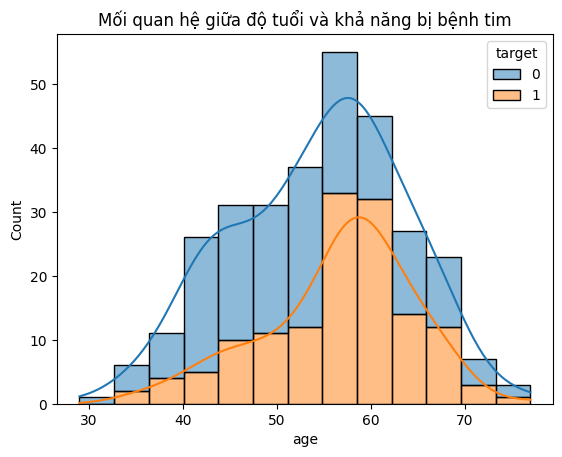

In [1]:
#Bài tập 1: Visualization mối quan hệ giữa độ tuổi và khả năng bị bệnh tim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Vẽ biểu đồ phân phối độ tuổi và khả năng bị bệnh tim
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Mối quan hệ giữa độ tuổi và khả năng bị bệnh tim')
plt.show()


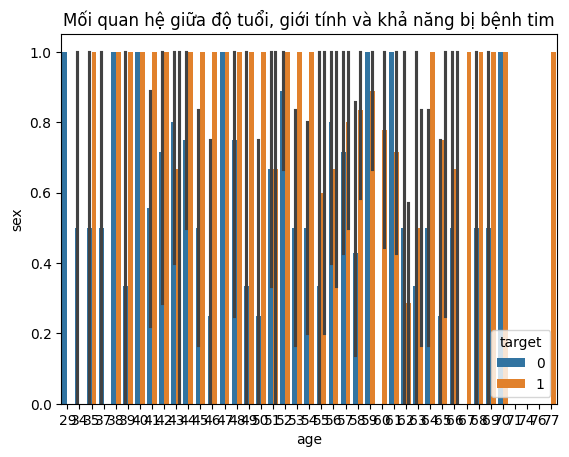

In [2]:
#Bài tập 2: Visualization mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Vẽ biểu đồ mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim
sns.barplot(x='age', y='sex', hue='target', data=df)
plt.title('Mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim')
plt.show()


In [3]:
#Bài tập 3: Dự đoán bệnh tim bằng KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Đọc dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Tách dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [4]:
#Bài tập 4: Dự đoán bệnh tim bằng SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Sử dụng SVM với kernel RBF
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [5]:
#Bài tập 5: Dự đoán bệnh tim bằng Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Áp dụng Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Naive Bayes = {accuracy_for_train}')
print(f'Accuracy for test set for Naive Bayes = {accuracy_for_test}')


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [6]:
#Bài tập 6: Dự đoán bệnh tim bằng Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Áp dụng Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Decision Tree = {accuracy_for_train}')
print(f'Accuracy for test set for Decision Tree = {accuracy_for_test}')


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [7]:
#Bài tập 7: Dự đoán bệnh tim bằng Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Áp dụng Random Forest
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Random Forest = {accuracy_for_train}')
print(f'Accuracy for test set for Random Forest = {accuracy_for_test}')


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [8]:
#Bài tập 8: Dự đoán bệnh tim bằng Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Áp dụng Adaboost
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Adaboost = {accuracy_for_train}')
print(f'Accuracy for test set for Adaboost = {accuracy_for_test}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


In [9]:
#Bài tập 9: Dự đoán bệnh tim bằng GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Áp dụng GradientBoost
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for GradientBoost = {accuracy_for_train}')
print(f'Accuracy for test set for GradientBoost = {accuracy_for_test}')


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [10]:
#Bài tập 10: Dự đoán bệnh tim bằng XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Áp dụng XGBoost
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for XGboost = {accuracy_for_train}')
print(f'Accuracy for test set for XGboost = {accuracy_for_test}')


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


In [11]:
#Bài tập 11: Dự đoán bệnh tim bằng kỹ thuật Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Xây dựng mô hình stacking
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', random_state=42)),
    ('adaboost', AdaBoostClassifier(random_state=42))
]

stack = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state=42))
stack.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác
y_train_pred = stack.predict(X_train)
y_test_pred = stack.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print(f'Accuracy for training set for Stacking = {accuracy_for_train}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.89
